**Problem Description**
This unsupervised learning problem involves clustering movie reviews from IMDB. By clustering these reviews, the aim is for common sentiments and content across different clusters to be uncovered. By grouping similar reviews together without any labels, perhaps some patterns in the data can be uncovered. The process involves preparing the data, performing EDA, using TF-IDF feature extraction to convert text data into numerical vectors, and then applying the K-Means clustering algorithm. Once the models performance results are found, the model will be analyzed and EDA on the clusters will show any findings from the data.

**Dataset Description**
The dataset being used consists of IMDB movie reviews. It contains 50,000 movie reviews, split evenly into training and test sets with even sentiment labels (25k positive, 25k negative). There’s also an additional 50,000 unlabeled reviews. Each labeled review has a binary sentiment label (positive or negative), with positive reviews scoring 7 or above out of 10, and negative ones scoring 4 or below. The data is structured to ensure that no single movie dominates the dataset, which prevents bias.

In [7]:
# Data Loading and Preparation
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load the datasets

train_path = '/kaggle/input/imdb-reviews-stanford/train.csv'
test_path = '/kaggle/input/imdb-reviews-stanford/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Combine train and test data
df = pd.concat([train_df, test_df], ignore_index=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


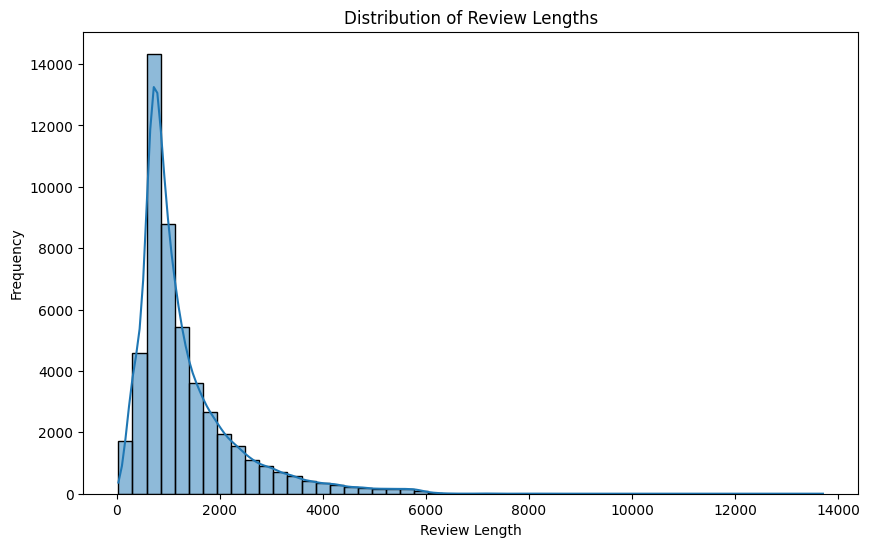

In [8]:
# Exploratory Data Analysis (EDA)

# Distribution of Review Lengths Visualization
df['review_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

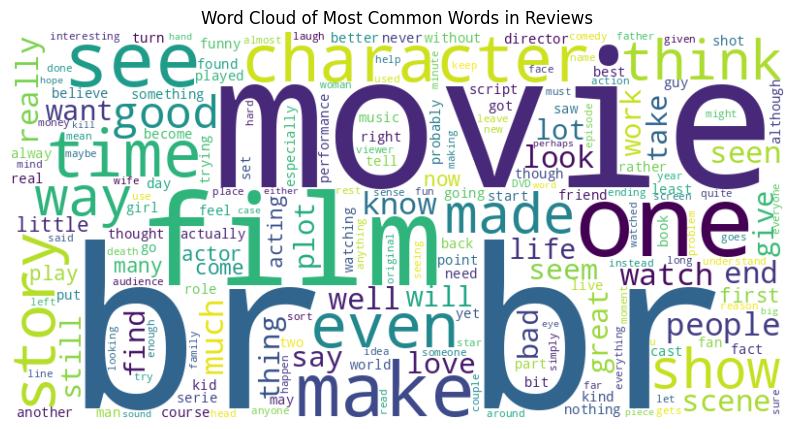

In [9]:
# Word Cloud of the Most Common Words in Reviews Visualization
all_reviews = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Reviews')
plt.show()

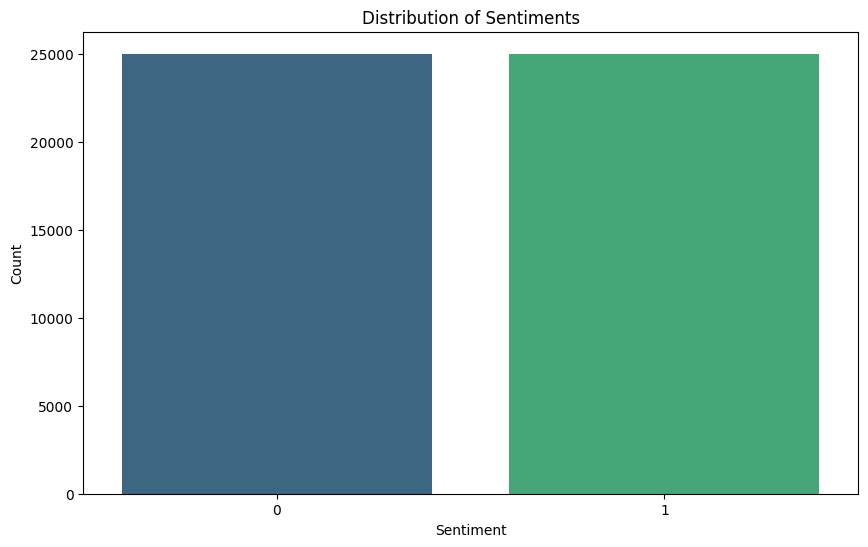

In [10]:
# Distribution of Sentiments Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

**Model Selection** For this project, the K-Means clustering unsupervised learning algorithm was used. I figured it was the best way to find clusters in such a large amount of dara ,as well as the most efficient. However, since the data was in a text format, TF-IDF (Term Frequency-Inverse Document Frequency) converts text into numerical vectors by calculating a score for each word based on its frequency in a document relative to its frequency across all documents. These vectors are then used by K-Means to group similar reviews into clusters based on their content.

In [11]:
# Feature Extraction using TF-IDF
# Convert the text data into numerical vectors using TF-IDF.

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf_vectorizer.fit_transform(df['text'])
# Print the TF-IDF vector for the first 5 reviews
print("TF-IDF vector for the first 5 reviews:")
print(X.toarray()[:5])

# Optionally, you can also print the feature names (words) corresponding to each index
print("\nFeature names (words corresponding to each index):")
print(tfidf_vectorizer.get_feature_names_out()[:10])  # showing the first 10 words


TF-IDF vector for the first 5 reviews:
[[0.         0.         0.         ... 0.         0.07529159 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

Feature names (words corresponding to each index):
['10' '100' '15' '20' '30' '50' '80' '90' 'ability' 'able']


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


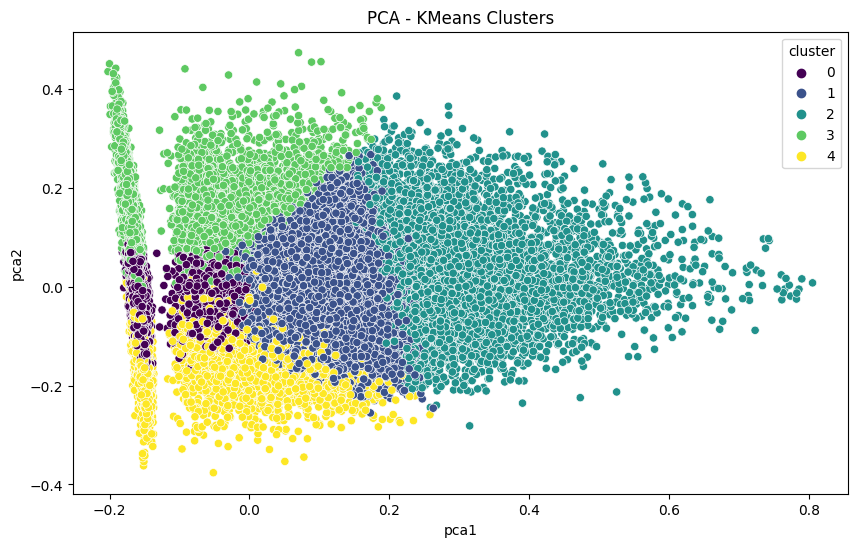

In [12]:
# K-Means Clustering using K-Means algorithm 

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

# Visualizing Clusters using PCA and t-SNE for dimensionality reduction and visualization

# PCA visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X.toarray())
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# t-SNE visualization
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_result = tsne.fit_transform(X.toarray())
df['tsne1'] = tsne_result[:, 0]
df['tsne2'] = tsne_result[:, 1]

# Plotting the Clusters

# PCA visualization plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis')
plt.title('PCA - KMeans Clusters')
plt.show()

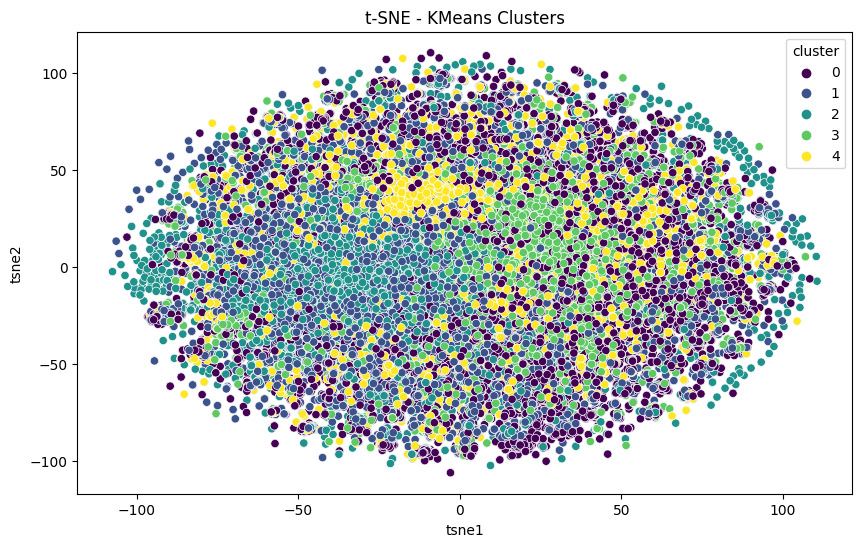

In [13]:
# t-SNE visualization plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=df, palette='viridis')
plt.title('t-SNE - KMeans Clusters')
plt.show()

**Model Analysis/ Discussion**
The K-Means clustering on the IMDB movie reviews showed some patterns, but it wasn't perfect. The PCA plot showed that while some groups were somewhat clear, there was still a lot of overlap, especially between certain clusters. The t-SNE plot made this even more obvious, with many clusters blending together, meaning the algorithm had a hard time separating different groups. This suggests that using a different number of clusters or trying another method might work better. Overall, the model found some structure, but it could be improved to make the clusters more distinct and clear. A bit more tweaking or using other approaches might help get better results.